## Inheritance

Below is the mechanism used by the python's classes and objects to **introduce itself**.

In [1]:
class Star:
    def __init__(self, name, galaxy):
        self.name = name
        self.galaxy = galaxy


sun = Star("Sun", "Milky Way")
print(sun)

When Python needs any class/object to be presented as a string (putting an object as an argument in the print() function invocation fits this condition) it tries to invoke a method named `__str__()` from the object and to use the string it returns.

In [2]:
class Star:
    def __init__(self, name, galaxy):
        self.name = name
        self.galaxy = galaxy

    def __str__(self):
        return self.name + ' in ' + self.galaxy  # NOTICE not using print()


sun = Star("Sun", "Milky Way")
print(sun)

Sun in Milky Way


### Inheritance 

Inheritance is a common practice (in object programming) **of passing attributes and methods from the superclass (defined and existing) to a newly created class, called the subclass.**

* In other words, inheritance **is a way of building a new class, not from scratch, but by using an already defined repertoire of traits.**


A 2-level inheritance is presented here:

In [3]:
class Vehicle:
    pass


class LandVehicle(Vehicle):
    pass


class TrackedVehicle(LandVehicle):
    pass


#### issubclass()

To know and be able to **identify a relationship between 2 classes** we use **`issubclass()`**, it can check if a particular class is a subclass of any other class.


The function returns `TRUE` if `Class1` is a **subclass** of `Class2`

In [10]:
issubclass(Class1, Class2)

NameError: name 'Class1' is not defined

**IMPORTANT: each class is considered to be a `subclass of itself.`**

In [9]:
issubclass(LandVehicle, LandVehicle)

True

#### isinstance()

**An object is an incarnation of a class.**


In other words, **object is like a cake baked using a RECIPIE which is included inside a class.**


**Issues**:

* If you have a cake (eg. an argunment is passed to the function), You want to know what recipie has been used to make it.

* You want to know if it contains nuts or not and other information.


Therefore, it is crucial to know whether an object has or doesnt have certian characterstics. Meaning **whether an object is of a certian class or not.**


**`isinstance(<object_name>, <Class_name>)`**: The function return TRUE is the object is an instance of the class.


**Being an instance of a class means that the object (the cake) has been prepared using a recipe contained in either the class or one of its superclasses.**


***Don't forget: if a subclass contains at least the same equipment as any of its superclasses, it means that objects of the subclass can do the same as objects derived from the superclass, ergo, it's an instance of its home class and any of its superclasses.***


In [13]:
class Vehicle:
    pass


class LandVehicle(Vehicle):
    pass


class TrackedVehicle(LandVehicle):
    pass

my_vehicle = Vehicle()
my_land_vehicle = LandVehicle()
my_tracked_vehicle = TrackedVehicle()

print(isinstance(my_tracked_vehicle,Vehicle))
print(isinstance(my_tracked_vehicle,LandVehicle))
print(isinstance(my_tracked_vehicle,TrackedVehicle))

for obj in [my_vehicle, my_land_vehicle, my_tracked_vehicle]:
    for cls in [Vehicle, LandVehicle, TrackedVehicle]:
        print(isinstance(obj, cls), end="\t")
    print()


True
True
True
True	False	False	
True	True	False	
True	True	True	


#### is Operator

**`object_one is object_two`**


* It checks whether two variables (`object_one` and `object_two` here) refer to the same object.


* Don't forget that variables don't store the objects themselves, but only the handles pointing to the internal Python memory.

In [16]:
class SampleClass:
    def __init__(self, val):
        self.val = val


object_1 = SampleClass(0)
object_2 = SampleClass(2)
object_3 = object_1
object_3.val += 10      # If I change the value of obj3 value of obj1 also changes

print(object_1 is object_2)
print(object_2 is object_3)
print(object_3 is object_1)
print(object_1.val, object_2.val, object_3.val)

string_1 = "Mary had a little "
string_2 = "Mary had a little lamb"
string_1 += "lamb"

print(string_1 == string_2, string_1 is string_2)


False
False
True
10 2 10
True False


#### Inhertiting Methods and Properties (2 Methods)


The Sub class defines its own constructor, which invokes the one from the superclass.

* We've explicitly named the superclass, and pointed to the method to invoke `__init__()`, providing all needed arguments.


* As there is **no `__str__()` method within the Sub class**, the printed string is to be produced within the Super class. **This means that the `__str__()` method has been inherited by the Sub class.**

##### Using Class Name

In [1]:
class Ak1:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return "My name is " + self.name + "."
    
    def bad(self):
        return print("nothing")

class Sub(Ak1):
    def __init__(self, name):
        Ak1.__init__(self, name)    ## It has inherited __str__ as well
        Ak1.bad(self)


obj = Sub("Akshay")

print(obj)


nothing
My name is Akshay.


##### Using super()  (Remember not to pass `self` to this function)

The main difference is using this METHOD you can **not only to invoke the superclass constructor, but also to get access to any of the resources available inside the superclass.**

In [34]:
class Ak1:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return "My name is " + self.name + "."
    
    def bad(self):
        return print("nothing")

class Sub(Ak1):
    def __init__(self, name):
        super().__init__(name)  ### Observe
        super().bad()


obj = Sub("Dandgaval")

print(obj)


nothing
My name is Dandgaval.


`<class_name>.__str__(self)` <br>

`super().__str__()` (There is no self in here)

In [3]:
class Dog:
    kennel = 0
    def __init__(self, breed):
        self.breed = breed
        Dog.kennel += 1
    def __str__(self):
        return self.breed + " says: Woof!"


class SheepDog(Dog):
    def __str__(self):
        return super().__str__() + " Don't run away, Little Lamb!"


class GuardDog(Dog):
    def __str__(self):
        return super().__str__() + " Stay where you are, Mister Intruder!"
    
class LowlandDog(SheepDog):
    def __str__(self):
        return Dog.__str__(self) + " I don't like mountains!"   ##### PAY ATTTENTION
    

rocky = SheepDog("Collie")
luna = GuardDog("Dobermann")
a=LowlandDog("A")

print(rocky)
print(luna)
print(a)

Collie says: Woof! Don't run away, Little Lamb!
Dobermann says: Woof! Stay where you are, Mister Intruder!
A says: Woof! I don't like mountains!


##### Inhertiting the Properties/Class Variables and Instance Variables

The subclass also inherits the class variables from the superclass

In [37]:
# Testing properties: class variables.
class Super:
    class_var_1 = 1000
    


class Sub(Super):
    class_var_2 = 22222


obj = Sub()

print(obj.class_var_1)
print(obj.class_var_2)


1000
22222


In [38]:
# Testing properties: instance variables.
class Super:
    def __init__(self):
        self.instance_var_1 = 11


class Sub(Super):
    def __init__(self):
        super().__init__()
        self.instance_var_2 = 12


obj = Sub()
print(obj.instance_var_1)
print(obj.instance_var_2)


11
12


When you try to access any object's entity, Python will try to (in this order):

* find **it inside the object itself**;
* find it in all classes involved in the **object's inheritance line from bottom to top;**
* If both of the above fail, an exception (`AttributeError`) is raised.

In [4]:
class Level1:
    class_var_1 = 100
    def __init__(self):
        self.instance_var_1 = 101

    def fun_1(self):
        return 102


class Level2(Level1):
    class_var_2 = 200
    def __init__(self):
        super().__init__()
        self.instance_var_2 = 201
        Level1.temp=7999          #### Observe this 
    
    def fun_2(self):
        return 202


class Level3(Level2):
    class_var_3 = 300
    def __init__(self):
        super().__init__()
        self.instance_var_3 = 301

    def fun_3(self):
        return 302


obj = Level3()

print(obj.class_var_1, obj.instance_var_1, obj.fun_1())
print(obj.class_var_2, obj.instance_var_2, obj.fun_2())
print(obj.class_var_3, obj.instance_var_3, obj.fun_3())
print(obj.temp)


100 101 102
200 201 202
300 301 302
7999


The subclass now inherits all the goods offered by **both `SuperA` and `SuperB`.**

In [41]:
class SuperA:
    var_a = 10
    def fun_a(self):
        return 11


class SuperB:
    var_b = 20
    def fun_b(self):
        return 21


class Sub(SuperA, SuperB):
    pass

obj = Sub()

print(obj.var_a, obj.fun_a())
print(obj.var_b, obj.fun_b())

10 11
20 21


##### Overriding

Here you can see that **the entity defined later (in the inheritance sense) overrides the same entity defined earlier**.


We can also say that **Python looks for an entity from bottom to top, and is fully satisfied with the first entity of the desired name.**


In [42]:
class Level1:
    var = 100
    def fun(self):
        return 101


class Level2(Level1):
    var = 200
    def fun(self):
        return 201


class Level3(Level2):
    pass


obj = Level3()

print(obj.var, obj.fun())

200 201


We can say that Python looks for object components in the following order:

* inside the object itself;
* in its superclasses, from bottom to top;
* if there is **more than one class on a particular inheritance path**, Python scans them from **`left to right.`**

In [46]:
class Left:
    var = "L"
    var_left = "LL"
    def fun(self):
        return "Left"


class Right:
    var = "R"
    var_right = "RR"
    def fun(self):
        return "Right"


class Sub(Left, Right):   # Try class Sub(Right, Left):   
    pass


obj = Sub()

print(obj.var, obj.var_left, obj.var_right, obj.fun())


L LL RR Left


Take a look at `self.do_it()`

* when `two=Two()` we are inheriting all the methods of 1 into 2 
* Therefore when we do `two.doanyting()` it is pointing to `self.do_it()` in the `TWO object` itself 

In [47]:
class One:
    def do_it(self):
        print("do_it from One")

    def doanything(self):
        self.do_it()


class Two(One):
    def do_it(self):
        print("do_it from Two")


one = One()
two = Two()

one.doanything()
two.doanything()

do_it from One
do_it from Two


### Hierarchy of Class and Polymorphism

The situation in which the **subclass is able to modify its superclass behavior (just like in the example) is called polymorphism**


In other words, it means that **one and the same class can take various forms depending on the redefinitions done by any of its subclasses.**



The **`method` which is redefined in any of the superclasses, thus changing the behavior of the superclass, is called `virtual`.**


In [ ]:
import time

class Vehicle:
    def change_direction(left, on):
        pass

    def turn(left):                           ## This is the main thing
        change_direction(left, True)
        time.sleep(0.25)
        change_direction(left, False)


class TrackedVehicle(Vehicle):
    def control_track(left, stop):     # These are the changes specific to vehicle which are called by turn()
        pass

    def change_direction(left, on):     # These are the changes specific to vehicle which are called by turn()
        control_track(left, on)


class WheeledVehicle(Vehicle):
    def turn_front_wheels(left, on):    # These are the changes specific to vehicle which are called by turn()
        pass

    def change_direction(left, on):   # These are the changes specific to vehicle which are called by turn()
        turn_front_wheels(left, on)


Ex:
* When do `ak=WheeledVehicle()`
* Then I do `ak.turn()`
* The `WheeledVehicle()` will inherit `turn()` from the Vehicle Class and the turn() has the names
`changedir()` which is defined by the WheeledVehicle() class which is specific for that vehicle


This is how polymorphism helps the developer to keep the code clean and consistent.




In the `Vehicle Class` you see `change_dir` it is empty, this is called **`abstract method`** as we are going to put all the details into the subclass.


It is called so cause **as it only demonstrates some possibility which will be instantiated later**

### Composition

**It is the process of composing an object using other different objects**


* **Inheritance**: extends a class's capabilities by adding new components and modifying existing ones; in other words, the complete recipe is contained inside the class itself and all its ancestors; the object takes all the class's belongings and makes use of them;


* **Composition**: projects a class as a container able to store and use other objects (derived from other classes) where each of the objects implements a part of a desired class's behavior.

In [48]:
import time

class Tracks:
    def change_direction(self, left, on):
        print("tracks: ", left, on)


class Wheels:
    def change_direction(self, left, on):
        print("wheels: ", left, on)


class Vehicle:
    def __init__(self, controller):
        self.controller = controller

    def turn(self, left):
        self.controller.change_direction(left, True)
        time.sleep(0.25)
        self.controller.change_direction(left, False)


wheeled = Vehicle(Wheels())
tracked = Vehicle(Tracks())

wheeled.turn(True)
tracked.turn(False)


wheels:  True True
wheels:  True False
tracks:  False True
tracks:  False False


### What is Method Resolution Order (MRO) and why is it that not all inheritances make sense?


Python's MRO cannot be bent or violated, not just because that's the way Python works, but also because it’s a rule you have to obey.

#### Single Inheritance

In [49]:
class Top:
    def m_top(self):
        print("top")


class Middle(Top):
    def m_middle(self):
        print("middle")


class Bottom(Middle):
    def m_bottom(self):
        print("bottom")


object = Bottom()
object.m_bottom()
object.m_middle()
object.m_top()


bottom
middle
top


#### Multiple Inheritance (Middle, Top)

In [50]:
class Top:
    def m_top(self):
        print("top")


class Middle(Top):
    def m_middle(self):
        print("middle")


class Bottom(Middle, Top): ###  This will  RUN
    def m_bottom(self):
        print("bottom")


object = Bottom()
object.m_bottom()
object.m_middle()
object.m_top()



bottom
middle
top


#### Single Inheritance (Top, Middle)

In [51]:
class Top:
    def m_top(self):
        print("top")


class Middle(Top):
    def m_middle(self):
        print("middle")


class Bottom(Top, Middle):  ###  This will NOT RUN
    def m_bottom(self):
        print("bottom")


object = Bottom()
object.m_bottom()
object.m_middle()
object.m_top()



TypeError: Cannot create a consistent method resolution
order (MRO) for bases Top, Middle

<div>
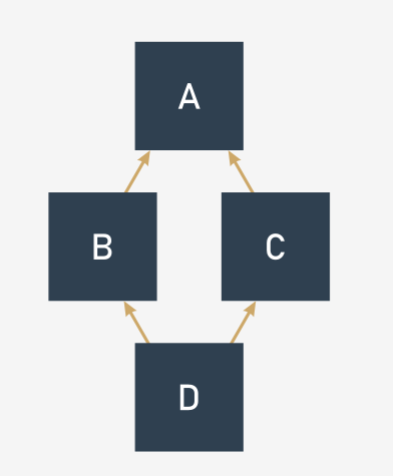
</div>

In [54]:
class Top:
    def m_top(self):
        print("top")


class Middle_Left(Top):
    def m_middle(self):
        print("middle_left")


class Middle_Right(Top):
    def m_middle(self):
        print("middle_right")


class Bottom(Middle_Right, Middle_Left): ## SWAP to class Bottom(Middle_Left, Middle_Right)
    def m_bottom(self):
        print("bottom")


object = Bottom()
object.m_bottom()
object.m_middle()
object.m_top()



bottom
middle_right
top


### TRICKY

`is` checks if two variables refer to the same object.

In [57]:
class Mouse:
    pass


mickey = Mouse()
minnie = Mouse()
cloned_mickey = mickey
print(mickey is minnie, mickey is cloned_mickey)  # Prints "False True".



False True


A parameterless function named `super()` returns a reference to the nearest superclass of the class.

In [56]:
class Mouse:
    def __str__(self):
        return "Mouse"


class LabMouse(Mouse):
    def __str__(self):
        return "Laboratory " + super().__str__()


doctor_mouse = LabMouse();
print(doctor_mouse)  # Prints "Laboratory Mouse".



Laboratory Mouse


**Methods as well as instance and class variables** defined in a `superclass` are automatically inherited by their subclasses.

In order **to find any object/class property**, Python looks for it inside:

* the object itself;


* all classes involved in the object's inheritance line **from bottom to top**


* if there is more than one class on a particular inheritance path, Python scans them **from left to right**



* if both of the above fail, the **`AttributeError`** exception is raised.


If any of the subclasses defines a method/class variable/instance variable of the **same name as existing in the superclass**, the **new name overrides any of the previous instances of the name**

In [58]:
class Mouse:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return "My name is " + self.name

class AncientMouse(Mouse):
    def __str__(self):
        return "Meum nomen est " + self.name

mus = AncientMouse("Caesar")  # Prints "Meum nomen est Caesar"
print(mus)



Meum nomen est Caesar


In [64]:
class Dog:
    kennel = 0
    def __init__(self, breed):
        self.breed = breed
        Dog.kennel += 1
    def __str__(self):
        return self.breed + " says: Woof!"


class SheepDog(Dog):
    def __str__(self):
        return super().__str__() + " Don't run away, Little Lamb!"


class GuardDog(Dog):
    def __str__(self):
        return super().__str__() + " Stay where you are, Mister Intruder!"
    
class LowlandDog(SheepDog):
    def __str__(self):
        return Dog.__str__(self) + " I don't like mountains!"   ##### PAY ATTTENTION
    

rocky = SheepDog("Collie")
luna = GuardDog("Dobermann")
a=LowlandDog("A")

print(a)

A says: Woof! I don't like mountains!
